In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class NN:
    """(Mini-Batch/Stochastic) Gradient Descent ADAptive LInear NEuron classifier.

    Attributes
    -----------
    w : 1d-array
      Weights after fitting.
    cost : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self,eta,epoch,active_method,rand_state=1) -> None:
        """Initialize the object

        Args:
            eta (float): Learning rate (between 0.0 and 1.0)
            epoch (int): Max number of itterations over dataset
            rand_state (int, optional): Random number generator seed for random weight initialization.
            active_method (str): activation function to be used
        """
        self.eta = eta
        self.rand_state = rand_state
        self.epoch = epoch
        self.active_method = active_method
    
    def activation(self,x,param):
        """Computes the activation"""
        match param:
            case "linear":
                return x
            case "binstep":
                return np.where(x>=0,1,-1)
            case "sigmoid":
                return 1/(1+np.exp(-x))
            case "tanh":
                return np.tanh(x)
            case "ReLU":
                return np.maximum(0,x)
            case "softplus":
                return np.log(1+np.exp(x))
            case "silu":
                return x/(1+np.exp(-x))
            case "gaussian":
                return np.exp(-x**2)
            case _:
                raise Exception("invalid activation function") 

    def fit(self,x,y,norm=False,plot=False):
        """Fit training data.
        Args:
        
            x (array): shape = [n_examples, n_features] 
                       Training vectors, where n_examples is
                       the number of examples and n_features is
                       the number of features.
            y (array): shape = [n_examples] ==> Target values.
            norm (bool, optional): pre-normalize data. Defaults to False.
            plot (bool, optional): weight update animation. Defaults to False.
        """
        if norm:
            x = self.normalize(x)
        fixed_prob = np.random.RandomState(self.rand_state)
        self.w = fixed_prob.normal(loc=0,scale= 0.1,size=x.shape[1])
        self.b = 1.
        self.costs = []
        for _ in range(self.epoch):
            shuffled_index = np.random.permutation(x.index)
            x = x.reindex(shuffled_index)
            y = y.reindex(shuffled_index)
            error = y-self.predict(x)
            self.w += self.eta*pd.Series(np.matmul(x.T, error))
            self.b += self.eta*error.sum()
            cost = (error**2).sum() / 2.0
            self.costs.append(cost)
            if plot:
                line1,fig = self.plotting()
                line1.set_xdata(range(len(self.w)))
                line1.set_ydata(self.w)
                # plt.plot(range(len(weights)), weights)
                fig.canvas.draw()
                fig.canvas.flush_events()
                plt.pause(0.1)
        if plot:
            plt.ioff()
            plt.title= "You can Close This Window"
            plt.show()
                                                        
    def net_input(self,x):
        """Calculate net input"""
        return np.dot(x,self.w)+ self.b

    def predict(self,x,decimal_number=1):
        """Return class label (float)"""
        return np.around(self.activation(self.net_input(x),self.active_method),decimal_number)

    def normalize(self,x):
        """Standardization (Z-score Normalization) to 
            have zero mean & unit variance"""
        return (x-np.mean(x,axis=0))/np.std(x,axis=0)

    def plotting(self):
        """initializing the plot for further use in fit function
           if plot is set to True.

        Returns:
            object: returns initial frame for the animation
        """
        plt.ion()
        # creating subplot and figure
        fig = plt.figure()
        ax = fig.add_subplot(111)
        (line1,) = ax.plot(range(len(self.w)), self.w)
        #plt.title("animated plot of weights over itterations", fontsize=20)
        plt.xlabel("index for each weight")
        plt.ylabel("weights")
        ax.set_xlim(0, 4)
        ax.set_ylim(-2, 2)
        return line1,fig
    def accuracy(self,prediction,target):
        """ percentage accuracy

        Args:
            prediction (array): prediction done by adaline
            target (array): target values given

        Returns:
            str: Returns a String with percentage accuracy
        """
        # dividing the prediction into two classes >0 & <0
        binary_adjusted_prediction = self.activation(prediction,"binstep")
        accuracy_perc = 100-(len(target)-sum(binary_adjusted_prediction==target))/len(target)*100
        return f"Accuracy percentage: {accuracy_perc}%"
    def target_predict_table(self,prediction,target):
        """Table consisting of target and predicted classes

        Args:
            prediction (array): prediction done by adaline
            target (array): target values given

        Returns:
            Pandas Dataframe: Table with two columns
        """
        # dividing the prediction into two classes >0 & <0
        binary_adjusted_prediction = self.activation(prediction,"binstep")
        d = {"Test_Targets":target,"Predict_by_AdalineSGD":binary_adjusted_prediction}
        return pd.DataFrame(data=d)
    def plot_costs(self):
        fig = plt.figure(figsize=(15,10))
        plt.plot(range(1,self.epoch+1),self.costs)
        plt.title="Costs VS Epoch"
        plt.xlabel("Epoch no.")
        plt.ylabel("Sum of Errors Squared")
        plt.grid(True)
        plt.show()

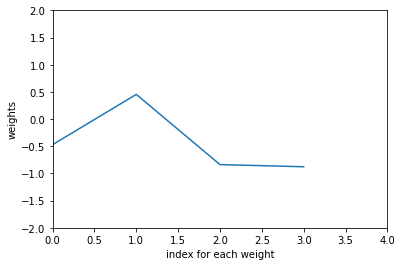

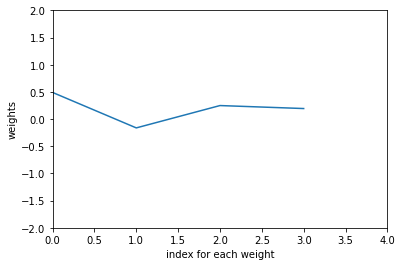

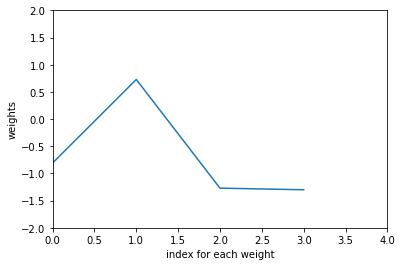

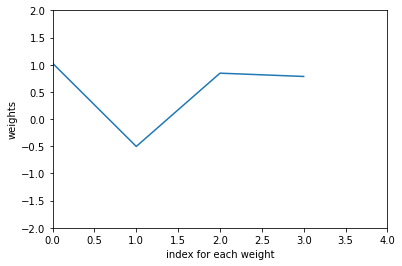

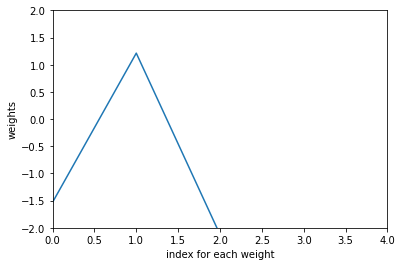

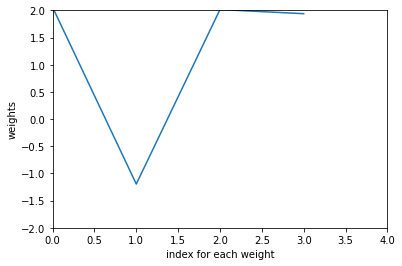

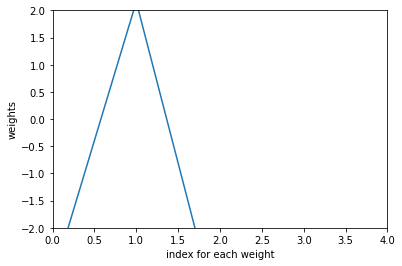

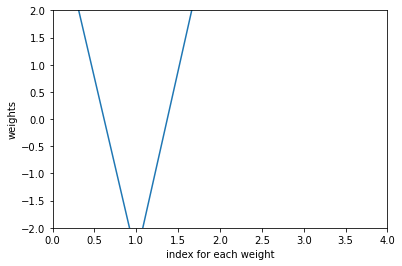

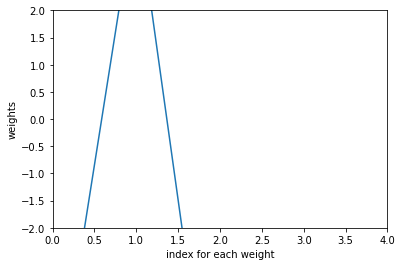

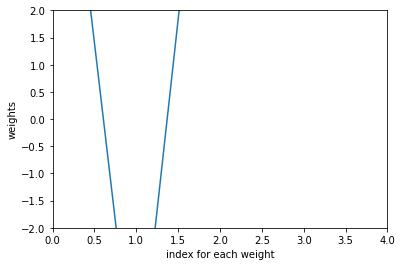

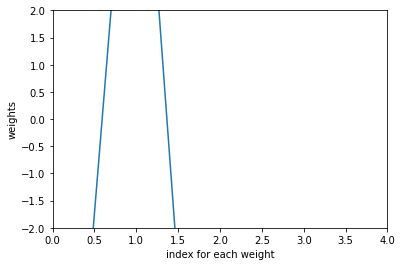

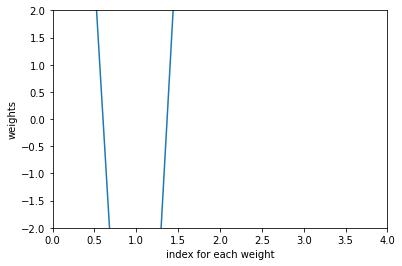

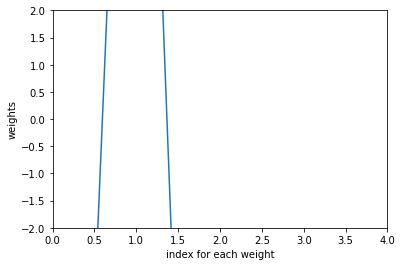

Accuracy percentage: 100.0%
    Test_Targets  Predict_by_AdalineSGD
83            -1                     -1
69            -1                     -1
44             1                      1
95            -1                     -1
64            -1                     -1
16             1                      1
15             1                      1
27             1                      1
99            -1                     -1
36             1                      1
35             1                      1
42             1                      1
48             1                      1
32             1                      1
66            -1                     -1
5              1                      1
68            -1                     -1
10             1                      1
92            -1                     -1
73            -1                     -1


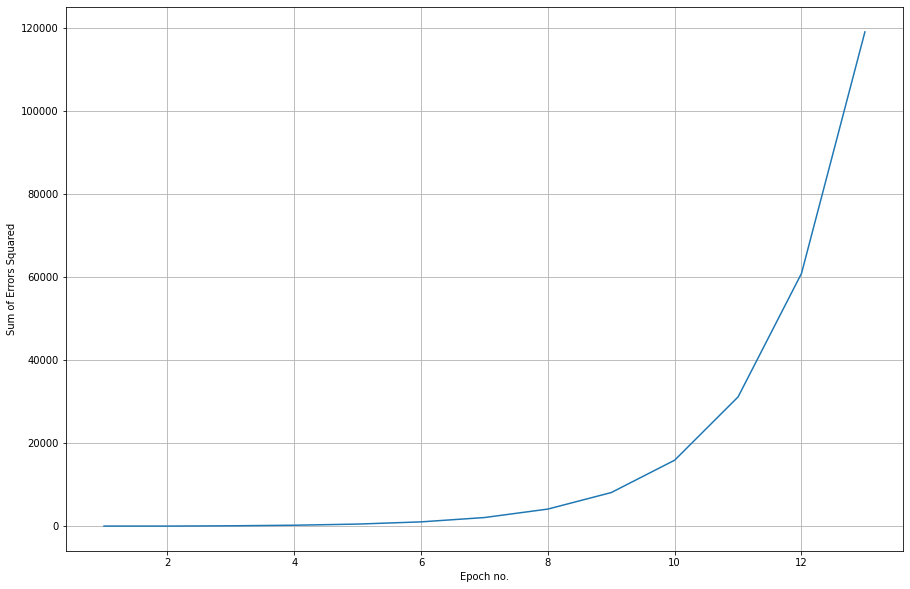

In [432]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# Data pre-processing
df = pd.read_csv('iris.data', header=None, encoding='utf-8').iloc[:100]
#fixed_prob = np.random.RandomState(10)
shuffled_index = np.random.permutation(df.index) # fixed_prob.permutation(...)
# shuffling the dataset before dividing the test/train portions
df = df.reindex(shuffled_index) 
# convert categorical variables into numerical
df[df.columns[4]] = np.where(df.iloc[0:100, 4] == 'Iris-setosa', 1, -1)
# extract train info
y = df.iloc[0:80, 4]
x = df.iloc[0:80,:4]
# extract test info
y_test = df.iloc[80:100, 4]
x_test = df.iloc[80:100,:4]
norm = True  # in case Z-score Normalization is needed, False otherwise
if norm:
    x_test= (x_test-np.mean(x,axis=0))/np.std(x) 

# Initialize ADAptive LInear NEuron classifier
ppn = NN(eta=0.01, epoch=13,active_method="linear")
# train the classifier
ppn.fit(x, y,norm,plot=True) # plot: animation plot of weight updates

# test the accuracy and performance
prediction = ppn.predict(x_test)
# printing the result of the test
print(ppn.accuracy(prediction,y_test))
print(ppn.target_predict_table(prediction,y_test))
# plot of costs
ppn.plot_costs()


In [54]:
error = np.ones(x.shape[0])
np.dot(error,x)
np.matmul(error, x)
pd.Series(np.matmul(x.T, error))

0    547.1
1    309.4
2    286.2
3     78.5
dtype: float64

In [424]:
def func(x,y=20):
    print(y)
    return new_func(x,y=10)

def new_func(x,y):
    print(y)
    return x+y
y = 23
print(y)
func(5,)

23
20
10


15

In [217]:
for _ in range(3):
    shuffled_index = np.random.permutation(df.index)
    print(df.reindex(shuffled_index).head(10))

       0    1    2    3                4
122  7.7  2.8  6.7  2.0   Iris-virginica
75   6.6  3.0  4.4  1.4  Iris-versicolor
131  7.9  3.8  6.4  2.0   Iris-virginica
36   5.5  3.5  1.3  0.2      Iris-setosa
33   5.5  4.2  1.4  0.2      Iris-setosa
101  5.8  2.7  5.1  1.9   Iris-virginica
82   5.8  2.7  3.9  1.2  Iris-versicolor
13   4.3  3.0  1.1  0.1      Iris-setosa
64   5.6  2.9  3.6  1.3  Iris-versicolor
110  6.5  3.2  5.1  2.0   Iris-virginica
       0    1    2    3                4
129  7.2  3.0  5.8  1.6   Iris-virginica
39   5.1  3.4  1.5  0.2      Iris-setosa
104  6.5  3.0  5.8  2.2   Iris-virginica
89   5.5  2.5  4.0  1.3  Iris-versicolor
90   5.5  2.6  4.4  1.2  Iris-versicolor
131  7.9  3.8  6.4  2.0   Iris-virginica
13   4.3  3.0  1.1  0.1      Iris-setosa
63   6.1  2.9  4.7  1.4  Iris-versicolor
127  6.1  3.0  4.9  1.8   Iris-virginica
45   4.8  3.0  1.4  0.3      Iris-setosa
       0    1    2    3                4
87   6.3  2.3  4.4  1.3  Iris-versicolor
67   5.8  2.7  4

(3.418, 0.38102439795469095)

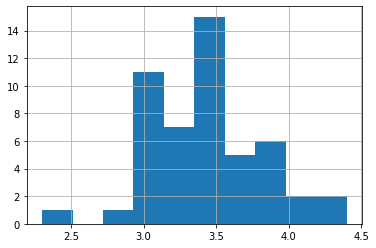

In [202]:
x_rec = s*x_n+m
m_n2 = x_rec.mean()
s_n2 = x_rec.std()
x_rec.hist()
m_n2,s_n2

In [203]:
m_n2 == m

True

In [204]:
s_n2 == s

True

In [226]:
x = df.iloc[:,:4]
y = df.iloc[:,-1]
x = x.reindex(shuffled_index)
y.reindex(shuffled_index)
x.head()

,0,1,2,3
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
132,6.4,2.8,5.6,2.2
34,4.9,3.1,1.5,0.1
125,7.2,3.2,6.0,1.8


In [237]:
y = np.where(y=="Iris-setosa",1,0)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [245]:
prod = (y - np.dot(weights,x.T))

In [251]:
np.dot(prod,x)

array([-452979.68097334, -231872.40865432, -301028.53386268,
        -97218.62040447])

In [260]:
list(zip(prod,x.iloc[:,0]))

[(-554.6431102859151, 6.3),
 (-504.7527367324566, 5.8),
 (-546.7312479213755, 6.4),
 (-434.01245727812403, 4.9),
 (-619.7753731131303, 7.2),
 (-582.1010624537874, 6.7),
 (-611.4737598160941, 7.1),
 (-404.04356497837244, 4.5),
 (-474.0980158771237, 5.6),
 (-387.0721188395579, 4.4),
 (-479.06563626388777, 5.5),
 (-480.5297007887937, 5.6),
 (-379.0970555756922, 4.3),
 (-493.86792850903674, 5.8),
 (-545.6525205480827, 6.3),
 (-460.3073389583711, 5.2),
 (-488.2594092486065, 5.6),
 (-521.4097211579287, 6.0),
 (-441.82965673748413, 5.0),
 (-449.846891558516, 5.1),
 (-580.2490155253661, 6.7),
 (-517.1418996361206, 6.0),
 (-404.1987835309759, 4.6),
 (-523.2316848490119, 6.1),
 (-445.01925351931254, 5.1),
 (-500.8351398378806, 5.9),
 (-480.24217442757464, 5.5),
 (-558.5503873896442, 6.4),
 (-544.357142251842, 6.2),
 (-611.5190792584752, 7.2),
 (-481.37654103409517, 5.5),
 (-508.2912922458488, 5.9),
 (-666.8793684933187, 7.7),
 (-537.6895456040453, 6.3),
 (-445.414294955613, 5.1),
 (-438.46872847